In [1]:
# import community
import numpy as np
import networkx as nx
import matplotlib as mpl
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import matplotlib.image as mpimg
import graphviz
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import random
import pydoc
from ds import McmcTree as Tree
from utils import ColorPrint as _

import sys
sys.path.append("..")
from datasets.synthetic.generator import TreeGenerator

font = {'weight' : 'normal',
        'size'   : 14}
mpl.rc('font', **font)

### The effect of changing $N$ for fixed $M$

In [2]:
M, N = 10, 20
ZETA = 1
Gamma = 0.15
alpha = 6*1e-6
beta = 0.15
MR = 0.00


all_result = []
for N in [10, 15, 20, 30, 50, 80]:
    means_pwd = []
    best_engs = []
    varia_pwd = []
    print(f'started with params: M={M}, N={N}')
    for rond in range(7):
        tg = TreeGenerator(
            M = M,
            N = N,
            ZETA = ZETA,
            Gamma = Gamma,
            alpha = alpha,
            beta = beta,
            MR = MR,
        )
        (gt_E, gt_D, D, gt_T) = tg.generate()
        gensNames = list( str(i) for i in range(M) )
        C_num = D.shape[1]
        G_num = D.shape[0]
#         _.print_warn( 'There is {} cells and {} mutations at {} genes in this dataset.'.format(C_num, G_num, len(gensNames)) )

        ### Fill missed data
        def tf(m,c):
            os = len(np.where(D[:,c]==1.))*1.
            zs = len(np.where(D[:,c]==0.))*1.
            return 1. if np.random.rand() < os/(os+zs) else 0.

        for m in range(G_num):
            for c in range(C_num):
                if D[m,c] == 3.:
                    D[m,c] = tf(m,c)
        ### Run
        dl = list(d for d in D)
        root = [n for n,d in gt_T.in_degree() if d==0][0]
#         print('ROOT:', root)
        T = Tree(gensNames, D, data_list=dl, root=str(root), alpha=alpha, beta=beta)
        T.set_ground_truth(gt_D, gt_E, gt_T=gt_T)
        T.randomize()
        # T.plot_best_T('initial T'); T.plot('T0')
        T.set_rho(15)
        for i in range(5000):
            if T.next():
                break
                
        ###  Benchmarking
        best_T = T.get_best_tree()
        best_g = best_T.to_undirected()
        gt_T = T.gt_T
        gt_T = gt_T.to_undirected()
        best_pair_dists = dict(nx.all_pairs_shortest_path_length(best_g))
        gt_pair_dists   = dict(nx.all_pairs_shortest_path_length(gt_T  ))
        diffs = []
        for i in range(M-1):
            for j in range(i+1, M):
                best_dis = best_pair_dists[str(i)][str(j)]
                gt_dis   = gt_pair_dists  [i][j]
                diff = abs(best_dis - gt_dis)
                diffs.append(diff)
        means_pwd.append(np.mean(diffs))
        varia_pwd.append(np.var(diffs))
        best_engs.append(T.get_best_error())
        print(f'\trond={rond}, mean_pwd={means_pwd[-1]:0.4f}, varia_pwd={varia_pwd[-1]:0.4f}, best_eng={best_engs[-1]:0.4f}')
        
    all_result.append({
        'params': {
            'M':M,
            'N':N, 
            'ZETA':ZETA,
            'Gamma':Gamma,
            'alpha':alpha,
            'beta':beta,
            'MR':MR,
        },
        'means_pwd': means_pwd,
        'varia_pwd': varia_pwd,
        'best_engs': best_engs
    })
    print(38*'-~')
    print(f'\tAVG_mean_pwd={np.mean(means_pwd):0.4f}, AVG_varia_pwd={np.mean(varia_pwd):0.4f}, AVG_best_eng={np.mean(best_engs):0.4f}\n\n')
#     T.plot_eng_chart()

started with params: M=10, N=10
	rond=0, mean_pwd=0.2000, varia_pwd=0.1600, best_eng=0.5028
	rond=1, mean_pwd=1.2444, varia_pwd=1.6514, best_eng=0.6610
	rond=2, mean_pwd=0.0000, varia_pwd=0.0000, best_eng=0.3598
	rond=3, mean_pwd=0.9333, varia_pwd=1.6178, best_eng=0.2337
	rond=4, mean_pwd=0.0000, varia_pwd=0.0000, best_eng=0.2337
	rond=5, mean_pwd=0.0000, varia_pwd=0.0000, best_eng=0.0450
	rond=6, mean_pwd=1.0222, varia_pwd=1.4440, best_eng=0.2337
-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~
	AVG_mean_pwd=0.4857, AVG_varia_pwd=0.6962, AVG_best_eng=0.3242


started with params: M=10, N=15
	rond=0, mean_pwd=0.6889, varia_pwd=0.4365, best_eng=0.4534
	rond=1, mean_pwd=0.6667, varia_pwd=0.3556, best_eng=0.1272
	rond=2, mean_pwd=0.6667, varia_pwd=0.3556, best_eng=0.6610
	rond=3, mean_pwd=0.9556, varia_pwd=2.1314, best_eng=0.1272
	rond=4, mean_pwd=0.3556, varia_pwd=0.2291, best_eng=0.0692
	rond=5, mean_pwd=0.3556, varia_pwd=0.2291, best_eng=0.6610
	rond=6, mean

/home/afshin/Desktop/itmt/src/ds.py:639: RuntimeWarning: divide by zero encountered in log
  np.log(self.alpha**fp_cnt + ep)
/home/afshin/Desktop/itmt/src/ds.py:382: RuntimeWarning: invalid value encountered in double_scalars
  acc_prob = min(1, (self.__errors[-1]/new_error))


	rond=0, mean_pwd=0.6222, varia_pwd=0.3240, best_eng=0.8330
	rond=1, mean_pwd=0.0000, varia_pwd=0.0000, best_eng=0.3871
	rond=2, mean_pwd=0.0000, varia_pwd=0.0000, best_eng=0.7626
	rond=3, mean_pwd=0.0000, varia_pwd=0.0000, best_eng=0.5644
	rond=4, mean_pwd=0.6222, varia_pwd=0.3240, best_eng=0.4437
	rond=5, mean_pwd=0.3556, varia_pwd=0.2291, best_eng=0.4151
	rond=6, mean_pwd=0.0000, varia_pwd=0.0000, best_eng=0.7975
-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~
	AVG_mean_pwd=0.2286, AVG_varia_pwd=0.1253, AVG_best_eng=0.6005


started with params: M=10, N=80
	rond=0, mean_pwd=0.4667, varia_pwd=0.2489, best_eng=0.6818
	rond=1, mean_pwd=0.0000, varia_pwd=0.0000, best_eng=0.2789
	rond=2, mean_pwd=0.0000, varia_pwd=0.0000, best_eng=0.8330
	rond=3, mean_pwd=0.3556, varia_pwd=0.2291, best_eng=0.3104
	rond=4, mean_pwd=0.3556, varia_pwd=0.2291, best_eng=0.5028
	rond=5, mean_pwd=0.3556, varia_pwd=0.2291, best_eng=0.3598
	rond=6, mean_pwd=0.3556, varia_pwd=0.2291, b

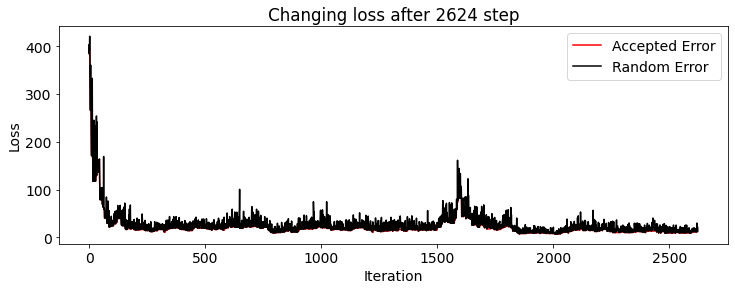

In [25]:
run_data = T.run_data
rd = np.array(run_data)
errors = T.get_errors()

new_acc_errors = []
new_random_errors = []
for i, t in enumerate(rd):
    rnd = np.random.rand()
    if t[-1] > rnd/10000:
        new_acc_errors.append(errors[i])
        new_random_errors.append(t[-2])
        
plt.figure(figsize=(12, 4))
plt.plot(new_acc_errors[1:], 'r', label='Accepted Error') # accepted errors
plt.plot(new_random_errors, 'k', label='Random Error') # random errors
# plt.plot(self.enrgs) # best errors
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Changing loss after {} step'.format(len(new_random_errors)))
# if filename:
#     plt.savefig(filename)
plt.show()

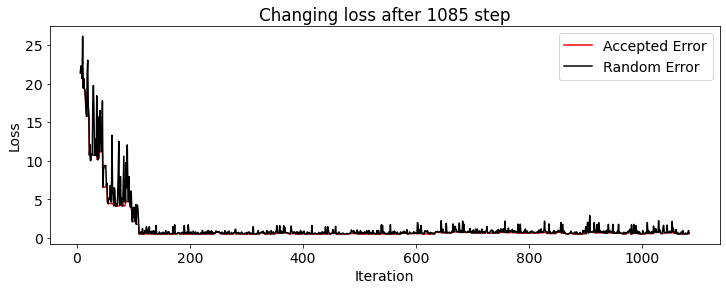

In [4]:
run_data = T.run_data
rd = np.array(run_data)
errors = T.get_errors()

new_acc_errors = []
new_random_errors = []
for i, t in enumerate(rd):
    rnd = np.random.rand()
    if t[-1] > rnd/10000:
        new_acc_errors.append(errors[i])
        new_random_errors.append(t[-2])
        
plt.figure(figsize=(12, 4))
plt.plot(new_acc_errors[1:], 'r', label='Accepted Error') # accepted errors
plt.plot(new_random_errors, 'k', label='Random Error') # random errors
# plt.plot(self.enrgs) # best errors
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Changing loss after {} step'.format(len(new_random_errors)))
# if filename:
#     plt.savefig(filename)
plt.show()

In [6]:
import json
with open('data_fix_M_and_N_change.json', 'w', encoding='utf-8') as f:
    json.dump(all_result, f, ensure_ascii=False, indent=4)

### The effect of changing $M$ for fixed $\frac{M}{N}$ ratio

In [17]:
M, N = 10, 50
ZETA = 1
Gamma = 0.15
alpha = 6*1e-6
beta = 0.15
MR = 0.00


all_result = []
for M in [10, 15, 20, 30]:
    N = int(M*1.2)
    means_pwd = []
    best_engs = []
    varia_pwd = []
    print(f'started with params: M={M}, N={N}')
    for rond in range(7):
        tg = TreeGenerator(
            M = M,
            N = N,
            ZETA = ZETA,
            Gamma = Gamma,
            alpha = alpha,
            beta = beta,
            MR = MR,
        )
        (gt_E, gt_D, D, gt_T) = tg.generate()
        gensNames = list( str(i) for i in range(M) )
        C_num = D.shape[1]
        G_num = D.shape[0]
#         _.print_warn( 'There is {} cells and {} mutations at {} genes in this dataset.'.format(C_num, G_num, len(gensNames)) )

        ### Fill missed data
        def tf(m,c):
            os = len(np.where(D[:,c]==1.))*1.
            zs = len(np.where(D[:,c]==0.))*1.
            return 1. if np.random.rand() < os/(os+zs) else 0.

        for m in range(G_num):
            for c in range(C_num):
                if D[m,c] == 3.:
                    D[m,c] = tf(m,c)
        ### Run
        dl = list(d for d in D)
        root = [n for n,d in gt_T.in_degree() if d==0][0]
#         print('ROOT:', root)
        T = Tree(gensNames, D, data_list=dl, root=str(root), alpha=alpha, beta=beta)
        T.set_ground_truth(gt_D, gt_E, gt_T=gt_T)
        T.randomize()
        # T.plot_best_T('initial T'); T.plot('T0')
        T.set_rho(15)
        for i in range(5000):
            if T.next():
                break
                
        ###  Benchmarking
        best_T = T.get_best_tree()
        best_g = best_T.to_undirected()
        gt_T = T.gt_T
        gt_T = gt_T.to_undirected()
        best_pair_dists = dict(nx.all_pairs_shortest_path_length(best_g))
        gt_pair_dists   = dict(nx.all_pairs_shortest_path_length(gt_T  ))
        diffs = []
        for i in range(M-1):
            for j in range(i+1, M):
                best_dis = best_pair_dists[str(i)][str(j)]
                gt_dis   = gt_pair_dists  [i][j]
                diff = abs(best_dis - gt_dis)
                diffs.append(diff)
        means_pwd.append(np.mean(diffs))
        varia_pwd.append(np.var(diffs))
        best_engs.append(T.get_best_error())
        print(f'\trond={rond}, mean_pwd={means_pwd[-1]:0.4f}, varia_pwd={varia_pwd[-1]:0.4f}, best_eng={best_engs[-1]:0.4f}')
        
    all_result.append({
        'params': {
            'M':M,
            'N':N, 
            'ZETA':ZETA,
            'Gamma':Gamma,
            'alpha':alpha,
            'beta':beta,
            'MR':MR,
        },
        'means_pwd': means_pwd,
        'varia_pwd': varia_pwd,
        'best_engs': best_engs
    })
    print(38*'-~')
    print(f'\tAVG_mean_pwd={np.mean(means_pwd):0.4f}, AVG_varia_pwd={np.mean(varia_pwd):0.4f}, AVG_best_eng={np.mean(best_engs):0.4f}\n\n')
#     T.plot_eng_chart()

import json
with open('data_fix_MoverN_ratio_and_M_change.json', 'w', encoding='utf-8') as f:
    json.dump(all_result, f, ensure_ascii=False, indent=4)

started with params: M=10, N=12
	rond=0, mean_pwd=0.5111, varia_pwd=0.2943, best_eng=0.7742
	rond=1, mean_pwd=0.3333, varia_pwd=0.4444, best_eng=0.5028
	rond=2, mean_pwd=0.3556, varia_pwd=0.2291, best_eng=0.0968
	rond=3, mean_pwd=0.5333, varia_pwd=0.2489, best_eng=0.5028
	rond=4, mean_pwd=1.2667, varia_pwd=2.6844, best_eng=0.1778
	rond=5, mean_pwd=0.7556, varia_pwd=0.4069, best_eng=0.1778
	rond=6, mean_pwd=0.8444, varia_pwd=0.5314, best_eng=0.2737
-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~
	AVG_mean_pwd=0.6571, AVG_varia_pwd=0.6914, AVG_best_eng=0.3580


started with params: M=15, N=18
	rond=0, mean_pwd=2.1333, varia_pwd=2.2108, best_eng=2.4691
	rond=1, mean_pwd=0.9333, varia_pwd=0.8622, best_eng=0.2737
	rond=2, mean_pwd=0.6286, varia_pwd=0.4430, best_eng=0.4752
	rond=3, mean_pwd=0.3619, varia_pwd=0.7452, best_eng=0.3698
	rond=4, mean_pwd=0.6857, varia_pwd=0.3679, best_eng=0.2737
	rond=5, mean_pwd=0.8571, varia_pwd=0.9224, best_eng=0.4752
	rond=6, mean

/home/afshin/Desktop/itmt/src/ds.py:639: RuntimeWarning: divide by zero encountered in log
  np.log(self.alpha**fp_cnt + ep)
/home/afshin/Desktop/itmt/src/ds.py:382: RuntimeWarning: invalid value encountered in double_scalars
  acc_prob = min(1, (self.__errors[-1]/new_error))


	rond=0, mean_pwd=1.9579, varia_pwd=3.3245, best_eng=1.5428
	rond=1, mean_pwd=1.6947, varia_pwd=2.3489, best_eng=1.8733
	rond=2, mean_pwd=1.4684, varia_pwd=1.7753, best_eng=1.4974
	rond=3, mean_pwd=1.6105, varia_pwd=2.4588, best_eng=0.8984
	rond=4, mean_pwd=2.5789, varia_pwd=5.1806, best_eng=1.8248
	rond=5, mean_pwd=2.3053, varia_pwd=3.8858, best_eng=3.3716
	rond=6, mean_pwd=2.8000, varia_pwd=5.6126, best_eng=2.8344
-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~
	AVG_mean_pwd=2.0594, AVG_varia_pwd=3.5124, AVG_best_eng=1.9775


started with params: M=30, N=36


/home/afshin/Desktop/itmt/src/ds.py:638: RuntimeWarning: divide by zero encountered in log
  np.log(self.beta**fn_cnt + ep) +\


	rond=0, mean_pwd=4.0782, varia_pwd=11.0376, best_eng=inf
	rond=1, mean_pwd=3.5609, varia_pwd=6.9727, best_eng=inf
	rond=2, mean_pwd=3.3540, varia_pwd=6.6103, best_eng=2.5815
	rond=3, mean_pwd=3.7885, varia_pwd=7.9829, best_eng=6.0554
	rond=4, mean_pwd=4.3655, varia_pwd=13.3124, best_eng=inf
	rond=5, mean_pwd=3.3931, varia_pwd=6.6018, best_eng=4.6452
	rond=6, mean_pwd=4.3517, varia_pwd=13.1476, best_eng=inf
-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~
	AVG_mean_pwd=3.8417, AVG_varia_pwd=9.3807, AVG_best_eng=inf




### The effect of changing $\alpha$ for fixed other params

In [22]:
M, N = 12, 16
ZETA = 1
Gamma = 0.15
alpha = 6*1e-6
beta = 0.05
MR = 0.00


all_result = []
for alpha in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]:
    means_pwd = []
    best_engs = []
    varia_pwd = []
    print(f'started with params: M={M}, N={N}')
    for rond in range(7):
        tg = TreeGenerator(
            M = M,
            N = N,
            ZETA = ZETA,
            Gamma = Gamma,
            alpha = alpha,
            beta = beta,
            MR = MR,
        )
        (gt_E, gt_D, D, gt_T) = tg.generate()
        gensNames = list( str(i) for i in range(M) )
        C_num = D.shape[1]
        G_num = D.shape[0]
#         _.print_warn( 'There is {} cells and {} mutations at {} genes in this dataset.'.format(C_num, G_num, len(gensNames)) )

        ### Fill missed data
        def tf(m,c):
            os = len(np.where(D[:,c]==1.))*1.
            zs = len(np.where(D[:,c]==0.))*1.
            return 1. if np.random.rand() < os/(os+zs) else 0.

        for m in range(G_num):
            for c in range(C_num):
                if D[m,c] == 3.:
                    D[m,c] = tf(m,c)
        ### Run
        dl = list(d for d in D)
        root = [n for n,d in gt_T.in_degree() if d==0][0]
#         print('ROOT:', root)
        T = Tree(gensNames, D, data_list=dl, root=str(root), alpha=alpha, beta=beta)
        T.set_ground_truth(gt_D, gt_E, gt_T=gt_T)
        T.randomize()
        # T.plot_best_T('initial T'); T.plot('T0')
        T.set_rho(15)
        for i in range(5000):
            if T.next():
                break
                
        ###  Benchmarking
        best_T = T.get_best_tree()
        best_g = best_T.to_undirected()
        gt_T = T.gt_T
        gt_T = gt_T.to_undirected()
        best_pair_dists = dict(nx.all_pairs_shortest_path_length(best_g))
        gt_pair_dists   = dict(nx.all_pairs_shortest_path_length(gt_T  ))
        diffs = []
        for i in range(M-1):
            for j in range(i+1, M):
                best_dis = best_pair_dists[str(i)][str(j)]
                gt_dis   = gt_pair_dists  [i][j]
                diff = abs(best_dis - gt_dis)
                diffs.append(diff)
        means_pwd.append(np.mean(diffs))
        varia_pwd.append(np.var(diffs))
        best_engs.append(T.get_best_error())
        print(f'\trond={rond}, mean_pwd={means_pwd[-1]:0.4f}, varia_pwd={varia_pwd[-1]:0.4f}, best_eng={best_engs[-1]:0.4f}')
        
    all_result.append({
        'params': {
            'M':M,
            'N':N, 
            'ZETA':ZETA,
            'Gamma':Gamma,
            'alpha':alpha,
            'beta':beta,
            'MR':MR,
        },
        'means_pwd': means_pwd,
        'varia_pwd': varia_pwd,
        'best_engs': best_engs
    })
    print(38*'-~')
    print(f'\tAVG_mean_pwd={np.mean(means_pwd):0.4f}, AVG_varia_pwd={np.mean(varia_pwd):0.4f}, AVG_best_eng={np.mean(best_engs):0.4f}\n\n')
#     T.plot_eng_chart()

import json
with open('data_fix_param_alpha_change.json', 'w', encoding='utf-8') as f:
    json.dump(all_result, f, ensure_ascii=False, indent=4)

started with params: M=12, N=16
	rond=0, mean_pwd=0.6212, varia_pwd=0.3262, best_eng=1.9489
	rond=1, mean_pwd=0.3030, varia_pwd=0.2112, best_eng=0.9058
	rond=2, mean_pwd=0.3030, varia_pwd=0.2112, best_eng=0.9058
	rond=3, mean_pwd=0.4091, varia_pwd=0.2417, best_eng=0.0000
	rond=4, mean_pwd=0.5303, varia_pwd=0.2491, best_eng=0.1743
	rond=5, mean_pwd=0.1667, varia_pwd=0.1389, best_eng=0.4930
	rond=6, mean_pwd=0.3030, varia_pwd=0.2112, best_eng=0.0000
-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~
	AVG_mean_pwd=0.3766, AVG_varia_pwd=0.2271, AVG_best_eng=0.6325


started with params: M=12, N=16
	rond=0, mean_pwd=0.5455, varia_pwd=0.3085, best_eng=1.9484
	rond=1, mean_pwd=0.2121, varia_pwd=0.3792, best_eng=1.3941
	rond=2, mean_pwd=0.1667, varia_pwd=0.1389, best_eng=2.5612
	rond=3, mean_pwd=0.4848, varia_pwd=0.2498, best_eng=1.9484
	rond=4, mean_pwd=0.5455, varia_pwd=0.2479, best_eng=0.9055
	rond=5, mean_pwd=0.5303, varia_pwd=0.2491, best_eng=0.1743
	rond=6, mean

### The effect of changing $\beta$ for fixed other params

In [23]:
M, N = 12, 16
ZETA = 1
Gamma = 0.15
alpha = 1e-5
beta = 0.15
MR = 0.00


all_result = []
for beta in [0.01, 0.03, 0.06, 0.1, 0.16, 0.25]:
    means_pwd = []
    best_engs = []
    varia_pwd = []
    print(f'started with params: M={M}, N={N}')
    for rond in range(7):
        tg = TreeGenerator(
            M = M,
            N = N,
            ZETA = ZETA,
            Gamma = Gamma,
            alpha = alpha,
            beta = beta,
            MR = MR,
        )
        (gt_E, gt_D, D, gt_T) = tg.generate()
        gensNames = list( str(i) for i in range(M) )
        C_num = D.shape[1]
        G_num = D.shape[0]
#         _.print_warn( 'There is {} cells and {} mutations at {} genes in this dataset.'.format(C_num, G_num, len(gensNames)) )

        ### Fill missed data
        def tf(m,c):
            os = len(np.where(D[:,c]==1.))*1.
            zs = len(np.where(D[:,c]==0.))*1.
            return 1. if np.random.rand() < os/(os+zs) else 0.

        for m in range(G_num):
            for c in range(C_num):
                if D[m,c] == 3.:
                    D[m,c] = tf(m,c)
        ### Run
        dl = list(d for d in D)
        root = [n for n,d in gt_T.in_degree() if d==0][0]
#         print('ROOT:', root)
        T = Tree(gensNames, D, data_list=dl, root=str(root), alpha=alpha, beta=beta)
        T.set_ground_truth(gt_D, gt_E, gt_T=gt_T)
        T.randomize()
        # T.plot_best_T('initial T'); T.plot('T0')
        T.set_rho(15)
        for i in range(5000):
            if T.next():
                break
                
        ###  Benchmarking
        best_T = T.get_best_tree()
        best_g = best_T.to_undirected()
        gt_T = T.gt_T
        gt_T = gt_T.to_undirected()
        best_pair_dists = dict(nx.all_pairs_shortest_path_length(best_g))
        gt_pair_dists   = dict(nx.all_pairs_shortest_path_length(gt_T  ))
        diffs = []
        for i in range(M-1):
            for j in range(i+1, M):
                best_dis = best_pair_dists[str(i)][str(j)]
                gt_dis   = gt_pair_dists  [i][j]
                diff = abs(best_dis - gt_dis)
                diffs.append(diff)
        means_pwd.append(np.mean(diffs))
        varia_pwd.append(np.var(diffs))
        best_engs.append(T.get_best_error())
        print(f'\trond={rond}, mean_pwd={means_pwd[-1]:0.4f}, varia_pwd={varia_pwd[-1]:0.4f}, best_eng={best_engs[-1]:0.4f}')
        
    all_result.append({
        'params': {
            'M':M,
            'N':N, 
            'ZETA':ZETA,
            'Gamma':Gamma,
            'alpha':alpha,
            'beta':beta,
            'MR':MR,
        },
        'means_pwd': means_pwd,
        'varia_pwd': varia_pwd,
        'best_engs': best_engs
    })
    print(38*'-~')
    print(f'\tAVG_mean_pwd={np.mean(means_pwd):0.4f}, AVG_varia_pwd={np.mean(varia_pwd):0.4f}, AVG_best_eng={np.mean(best_engs):0.4f}\n\n')
#     T.plot_eng_chart()

import json
with open('data_fix_param_beta_change.json', 'w', encoding='utf-8') as f:
    json.dump(all_result, f, ensure_ascii=False, indent=4)

started with params: M=12, N=16
	rond=0, mean_pwd=0.0000, varia_pwd=0.0000, best_eng=3.7091
	rond=1, mean_pwd=0.0000, varia_pwd=0.0000, best_eng=3.7091
	rond=2, mean_pwd=0.6667, varia_pwd=0.4040, best_eng=0.0000
	rond=3, mean_pwd=0.3030, varia_pwd=0.2112, best_eng=0.0000
	rond=4, mean_pwd=0.3030, varia_pwd=0.2112, best_eng=0.0000
	rond=5, mean_pwd=0.4091, varia_pwd=0.2417, best_eng=3.7091
	rond=6, mean_pwd=0.3030, varia_pwd=0.2112, best_eng=3.7091
-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~
	AVG_mean_pwd=0.2835, AVG_varia_pwd=0.1828, AVG_best_eng=2.1195


started with params: M=12, N=16
	rond=0, mean_pwd=0.5303, varia_pwd=0.2491, best_eng=0.4748
	rond=1, mean_pwd=0.3030, varia_pwd=0.2112, best_eng=1.3428
	rond=2, mean_pwd=0.3030, varia_pwd=0.2112, best_eng=1.3428
	rond=3, mean_pwd=0.4091, varia_pwd=0.2417, best_eng=1.3428
	rond=4, mean_pwd=0.4091, varia_pwd=0.2417, best_eng=1.3428
	rond=5, mean_pwd=1.0758, varia_pwd=2.2215, best_eng=0.4748
	rond=6, mean

### The effect of changing $MR$ for fixed other params

In [24]:
M, N = 12, 16
ZETA = 1
Gamma = 0.15
alpha = 1e-5
beta = 0.05
MR = 0.00


all_result = []
for MR in [0, 0.01, 0.02, 0.05, 0.1]:
    means_pwd = []
    best_engs = []
    varia_pwd = []
    print(f'started with params: M={M}, N={N}')
    for rond in range(7):
        tg = TreeGenerator(
            M = M,
            N = N,
            ZETA = ZETA,
            Gamma = Gamma,
            alpha = alpha,
            beta = beta,
            MR = MR,
        )
        (gt_E, gt_D, D, gt_T) = tg.generate()
        gensNames = list( str(i) for i in range(M) )
        C_num = D.shape[1]
        G_num = D.shape[0]
#         _.print_warn( 'There is {} cells and {} mutations at {} genes in this dataset.'.format(C_num, G_num, len(gensNames)) )

        ### Fill missed data
        def tf(m,c):
            os = len(np.where(D[:,c]==1.))*1.
            zs = len(np.where(D[:,c]==0.))*1.
            return 1. if np.random.rand() < os/(os+zs) else 0.

        for m in range(G_num):
            for c in range(C_num):
                if D[m,c] == 3.:
                    D[m,c] = tf(m,c)
        ### Run
        dl = list(d for d in D)
        root = [n for n,d in gt_T.in_degree() if d==0][0]
#         print('ROOT:', root)
        T = Tree(gensNames, D, data_list=dl, root=str(root), alpha=alpha, beta=beta)
        T.set_ground_truth(gt_D, gt_E, gt_T=gt_T)
        T.randomize()
        # T.plot_best_T('initial T'); T.plot('T0')
        T.set_rho(15)
        for i in range(5000):
            if T.next():
                break
                
        ###  Benchmarking
        best_T = T.get_best_tree()
        best_g = best_T.to_undirected()
        gt_T = T.gt_T
        gt_T = gt_T.to_undirected()
        best_pair_dists = dict(nx.all_pairs_shortest_path_length(best_g))
        gt_pair_dists   = dict(nx.all_pairs_shortest_path_length(gt_T  ))
        diffs = []
        for i in range(M-1):
            for j in range(i+1, M):
                best_dis = best_pair_dists[str(i)][str(j)]
                gt_dis   = gt_pair_dists  [i][j]
                diff = abs(best_dis - gt_dis)
                diffs.append(diff)
        means_pwd.append(np.mean(diffs))
        varia_pwd.append(np.var(diffs))
        best_engs.append(T.get_best_error())
        print(f'\trond={rond}, mean_pwd={means_pwd[-1]:0.4f}, varia_pwd={varia_pwd[-1]:0.4f}, best_eng={best_engs[-1]:0.4f}')
        
    all_result.append({
        'params': {
            'M':M,
            'N':N, 
            'ZETA':ZETA,
            'Gamma':Gamma,
            'alpha':alpha,
            'beta':beta,
            'MR':MR,
        },
        'means_pwd': means_pwd,
        'varia_pwd': varia_pwd,
        'best_engs': best_engs
    })
    print(38*'-~')
    print(f'\tAVG_mean_pwd={np.mean(means_pwd):0.4f}, AVG_varia_pwd={np.mean(varia_pwd):0.4f}, AVG_best_eng={np.mean(best_engs):0.4f}\n\n')
#     T.plot_eng_chart()

import json
with open('data_fix_param_MR_change.json', 'w', encoding='utf-8') as f:
    json.dump(all_result, f, ensure_ascii=False, indent=4)

started with params: M=12, N=16
	rond=0, mean_pwd=1.0152, varia_pwd=3.3786, best_eng=1.3941
	rond=1, mean_pwd=0.1667, varia_pwd=0.1389, best_eng=0.4929
	rond=2, mean_pwd=0.4848, varia_pwd=0.2498, best_eng=1.3941
	rond=3, mean_pwd=0.5758, varia_pwd=0.5170, best_eng=1.3941
	rond=4, mean_pwd=0.5303, varia_pwd=0.2491, best_eng=0.4929
	rond=5, mean_pwd=0.0000, varia_pwd=0.0000, best_eng=1.3941
	rond=6, mean_pwd=0.7576, varia_pwd=0.4564, best_eng=0.1743
-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~
	AVG_mean_pwd=0.5043, AVG_varia_pwd=0.7128, AVG_best_eng=0.9624


started with params: M=12, N=16
	rond=0, mean_pwd=0.0000, varia_pwd=0.0000, best_eng=1.9484
	rond=1, mean_pwd=0.5303, varia_pwd=0.2491, best_eng=0.4929
	rond=2, mean_pwd=0.1667, varia_pwd=0.1389, best_eng=1.9484
	rond=3, mean_pwd=0.8182, varia_pwd=0.4215, best_eng=1.3941
	rond=4, mean_pwd=0.3030, varia_pwd=0.2112, best_eng=0.4929
	rond=5, mean_pwd=0.3030, varia_pwd=0.2112, best_eng=0.4929
	rond=6, mean